# Continuous Control - DDPG



### 1. Start the Environment

Install a few packages. This line will take a few minutes to run!.

In [1]:
!pip -q install ../python
!pip install tqdm


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import numpy as np

from tqdm import tqdm

In [3]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
import time
from itertools import count

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.

Please select one of the two options below for loading the environment.

In [4]:
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examining the State and Action Spaces



Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 4. DDPG



In [7]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size,num_agents=num_agents ,random_seed=200)

Episode 1, Average last 100 scores: 0.44, Standard Deviation of last 100 scores: 0.31
Episode 2, Average last 100 scores: 0.49, Standard Deviation of last 100 scores: 0.29
Episode 3, Average last 100 scores: 0.55, Standard Deviation of last 100 scores: 0.36
Episode 4, Average last 100 scores: 0.56, Standard Deviation of last 100 scores: 0.39
Episode 5, Average last 100 scores: 0.62, Standard Deviation of last 100 scores: 0.45
Episode 6, Average last 100 scores: 0.65, Standard Deviation of last 100 scores: 0.33
Episode 7, Average last 100 scores: 0.73, Standard Deviation of last 100 scores: 0.49
Episode 8, Average last 100 scores: 0.82, Standard Deviation of last 100 scores: 0.66
Episode 9, Average last 100 scores: 0.95, Standard Deviation of last 100 scores: 0.95
Episode 10, Average last 100 scores: 1.07, Standard Deviation of last 100 scores: 0.99
Episode 11, Average last 100 scores: 1.18, Standard Deviation of last 100 scores: 1.06
Episode 12, Average last 100 scores: 1.27, Standard 

Episode 95, Average last 100 scores: 29.11, Standard Deviation of last 100 scores: 1.34
Episode 96, Average last 100 scores: 29.16, Standard Deviation of last 100 scores: 3.03
Episode 97, Average last 100 scores: 29.21, Standard Deviation of last 100 scores: 3.14
Episode 98, Average last 100 scores: 29.28, Standard Deviation of last 100 scores: 2.20
Episode 99, Average last 100 scores: 29.33, Standard Deviation of last 100 scores: 1.98
Episode 100, Average last 100 scores: 29.38, Standard Deviation of last 100 scores: 2.24
Episode 101, Average last 100 scores: 29.71, Standard Deviation of last 100 scores: 3.32
Episode 102, Average last 100 scores: 30.07, Standard Deviation of last 100 scores: 2.25
Episode 103, Average last 100 scores: 30.42, Standard Deviation of last 100 scores: 2.32
Episode 104, Average last 100 scores: 30.77, Standard Deviation of last 100 scores: 1.68
Episode 105, Average last 100 scores: 31.11, Standard Deviation of last 100 scores: 2.49
Episode 106, Average last 

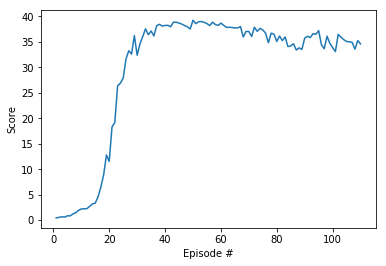

In [8]:
def ddpg(n_episodes=110, max_t=1500, print_every=100):
    scores_deque = deque(maxlen=print_every)
    MeanScores = []                                        # average of the score of the 20 agents for each episode
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score (for each agent)            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        MeanScores.append(score)      
        
        print('\rEpisode {}, Average last 100 scores: {:.2f}, Standard Deviation of last 100 scores: {:.2f}'\
                .format(i_episode, np.mean(scores_deque), np.std(scores), end="\n"))  
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')            
        
            
    return MeanScores,scores_deque


[scores,scores_deque] = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


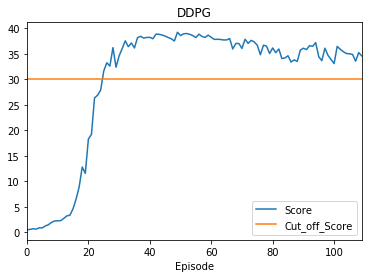

32.7656892676


In [14]:
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
import pandas as pd
# plot the scores




fig = plt.figure()
DDPG=pd.DataFrame()
DDPG['Episode']=np.arange(len(scores))
DDPG['Score']=scores
DDPG['Cut_off_Score']=30
DDPG.plot(x="Episode", y=["Score", "Cut_off_Score"])

plt.title('DDPG')
plt.show()
print (np.mean(scores_deque))